In [49]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x_train = torch.arange(1, 30, 1, dtype=torch.float32)
y_true = torch.arange(1, 30, 1, dtype=torch.float32)
noise = torch.randint(1, 5, (len(y_true),), dtype=torch.float32)

# Test

In [131]:
X = torch.arange(0, 40, 2, dtype=torch.float32)
y = torch.arange(0, 40, 2, dtype=torch.float32)

In [132]:
X, X.shape

(tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
         28., 30., 32., 34., 36., 38.]),
 torch.Size([20]))

In [133]:
y, y.shape

(tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
         28., 30., 32., 34., 36., 38.]),
 torch.Size([20]))

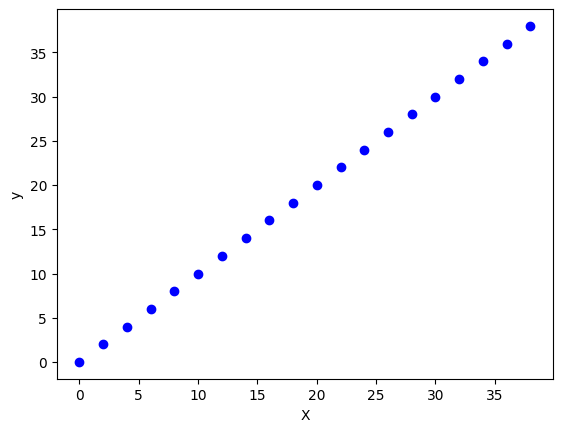

In [146]:
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [135]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()

        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))  # weight
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))  # bias

    def forward(self, X):
        return self.w * X + self.b

In [136]:
model = LinearRegression()

In [137]:
print(model)
print(model.state_dict())
model.b

LinearRegression()
OrderedDict([('w', tensor([-1.0908])), ('b', tensor([0.0551]))])


Parameter containing:
tensor([0.0551], requires_grad=True)

In [138]:
with torch.inference_mode():
    preds = model(X)

preds[:10]

tensor([  0.0551,  -2.1266,  -4.3082,  -6.4899,  -8.6715, -10.8532, -13.0348,
        -15.2165, -17.3982, -19.5798])

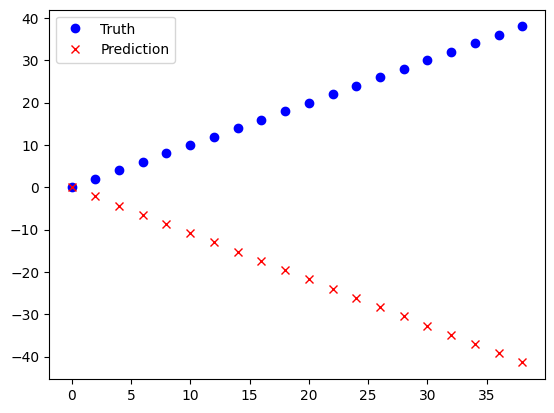

In [147]:
plt.plot(X, y, 'bo', label="Truth")
plt.plot(X, preds, 'rx', label="Prediction")
plt.legend()
plt.show()

In [140]:
from torch import optim

In [141]:
mse_loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [143]:
num_epochs = 100
for epoch in range(num_epochs):
    # 2. Set model in training mode
    model.train()

    # 3. Calculate predictions
    predictions = model(X)

    # 4. Calculate loss(predictions, truth)
    loss = mse_loss(predictions, y)

    # 5. Zero the gradients
    optimizer.zero_grad()

    # 6. Backpropagate the loss
    loss.backward()

    # 7. Update weights and biases
    optimizer.step()

    # Print loss after every epoch
    # if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}")

Epoch: 0, Loss: 1946.5484619140625
Epoch: 1, Loss: 1926.343994140625
Epoch: 2, Loss: 1906.2652587890625
Epoch: 3, Loss: 1886.313720703125
Epoch: 4, Loss: 1866.4906005859375
Epoch: 5, Loss: 1846.797119140625
Epoch: 6, Loss: 1827.2347412109375
Epoch: 7, Loss: 1807.8037109375
Epoch: 8, Loss: 1788.5054931640625
Epoch: 9, Loss: 1769.341064453125
Epoch: 10, Loss: 1750.3111572265625
Epoch: 11, Loss: 1731.416748046875
Epoch: 12, Loss: 1712.658203125
Epoch: 13, Loss: 1694.036376953125
Epoch: 14, Loss: 1675.5517578125
Epoch: 15, Loss: 1657.2047119140625
Epoch: 16, Loss: 1638.995849609375
Epoch: 17, Loss: 1620.92578125
Epoch: 18, Loss: 1602.994384765625
Epoch: 19, Loss: 1585.202392578125
Epoch: 20, Loss: 1567.5494384765625
Epoch: 21, Loss: 1550.0357666015625
Epoch: 22, Loss: 1532.6619873046875
Epoch: 23, Loss: 1515.4278564453125
Epoch: 24, Loss: 1498.333251953125
Epoch: 25, Loss: 1481.3779296875
Epoch: 26, Loss: 1464.5623779296875
Epoch: 27, Loss: 1447.885986328125
Epoch: 28, Loss: 1431.348876953

In [144]:
with torch.inference_mode():
    predictions = model(X)

predictions

tensor([ 1.0296,  0.8014,  0.5732,  0.3451,  0.1169, -0.1113, -0.3395, -0.5677,
        -0.7959, -1.0241, -1.2522, -1.4804, -1.7086, -1.9368, -2.1650, -2.3932,
        -2.6214, -2.8495, -3.0777, -3.3059])

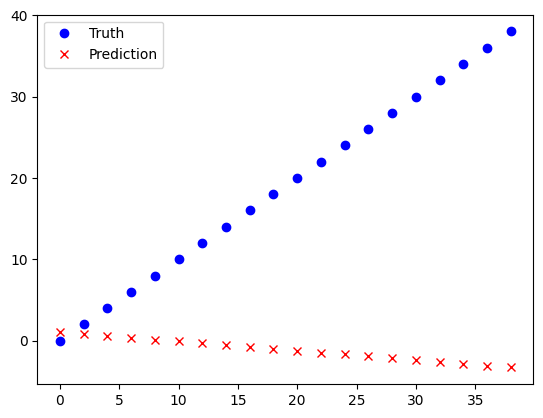

In [145]:
plt.plot(X, y, 'bo', label="Truth")
plt.plot(X, predictions, 'rx', label="Prediction")
plt.legend()

In [ ]:
y_train = y_true + noise

In [ ]:
x_train, y_train, noise

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
         29.]),
 tensor([ 5.,  4.,  6.,  5.,  8.,  9., 10.,  9., 10., 13., 15., 14., 16., 18.,
         19., 18., 20., 22., 20., 23., 23., 25., 25., 28., 26., 28., 28., 29.,
         32.]),
 tensor([4., 2., 3., 1., 3., 3., 3., 1., 1., 3., 4., 2., 3., 4., 4., 2., 3., 4.,
         1., 3., 2., 3., 2., 4., 1., 2., 1., 1., 3.]))

Text(0.5, 1.0, 'Before Training')

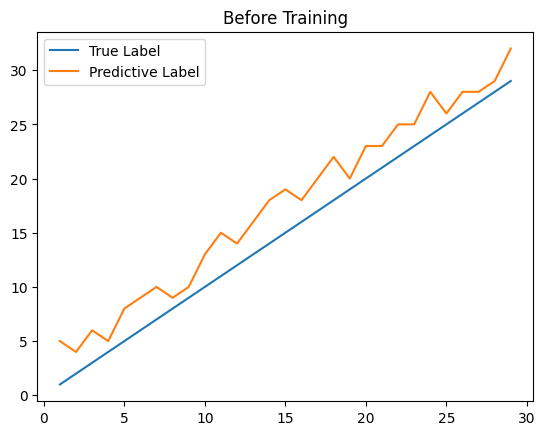

In [ ]:
plt.plot(x_train, y_true, label="True Label")
plt.plot(x_train, y_train, label="Predictive Label")
plt.legend()
plt.title("Before Training")

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.W = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float32))
        self.b = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x):
        return (self.W * x) + self.b

In [ ]:
model = LinearRegression()

In [ ]:
model.state_dict()

OrderedDict([('W', tensor([0.0061])), ('b', tensor([0.5981]))])

In [ ]:
with torch.inference_mode():
    pred = model(x_train)

pred

tensor([0.6042, 0.6103, 0.6165, 0.6226, 0.6287, 0.6348, 0.6410, 0.6471, 0.6532,
        0.6594, 0.6655, 0.6716, 0.6777, 0.6839, 0.6900, 0.6961, 0.7023, 0.7084,
        0.7145, 0.7206, 0.7268, 0.7329, 0.7390, 0.7452, 0.7513, 0.7574, 0.7635,
        0.7697, 0.7758])

Text(0.5, 1.0, 'Before Training')

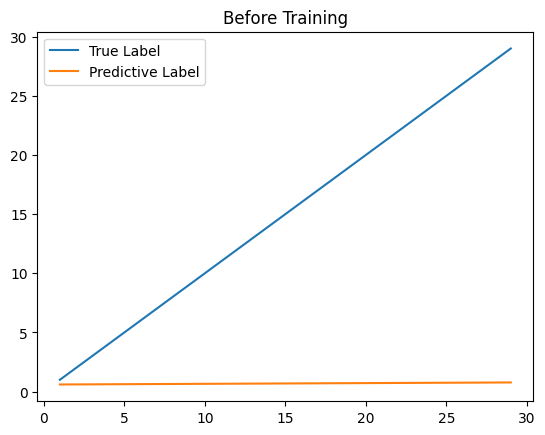

In [ ]:
plt.plot(x_train, y_true, label="True Label")
plt.plot(x_train, pred, label="Predictive Label")
plt.legend()
plt.title("Before Training")

In [ ]:
mse_loss = nn.L1Loss()
sgd_optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
tot_loss = []
for epoch in range(epochs):
    model.train()

    pred = model(x_train)

    loss = mse_loss(pred, y_true)
    tot_loss.append(loss)

    sgd_optim.zero_grad()
    loss.backward()

    sgd_optim.step()

    test_loss = 0
    model.eval()
    with torch.inference_mode():
        test_pred = model(x_train)
        lest_loss = mse_loss(test_pred, y_true)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss}, Test Loss: {test_loss}")
        print(model.state_dict())


Epoch: 1, Loss: 4.820420742034912, Test Loss: 0
OrderedDict([('W', tensor([0.6150])), ('b', tensor([1.1943]))])
Epoch: 11, Loss: 3.312582015991211, Test Loss: 0
OrderedDict([('W', tensor([0.7138])), ('b', tensor([1.2847]))])
Epoch: 21, Loss: 1.8946707248687744, Test Loss: 0
OrderedDict([('W', tensor([0.8109])), ('b', tensor([1.3682]))])
Epoch: 31, Loss: 0.7817161083221436, Test Loss: 0
OrderedDict([('W', tensor([0.9019])), ('b', tensor([1.4350]))])
Epoch: 41, Loss: 0.7354897856712341, Test Loss: 0
OrderedDict([('W', tensor([0.9526])), ('b', tensor([1.4486]))])
Epoch: 51, Loss: 0.5682041645050049, Test Loss: 0
OrderedDict([('W', tensor([0.9268])), ('b', tensor([1.3916]))])
Epoch: 61, Loss: 0.572390079498291, Test Loss: 0
OrderedDict([('W', tensor([0.9248])), ('b', tensor([1.3451]))])
Epoch: 71, Loss: 0.5313804149627686, Test Loss: 0
OrderedDict([('W', tensor([0.9402])), ('b', tensor([1.3076]))])
Epoch: 81, Loss: 0.5097472667694092, Test Loss: 0
OrderedDict([('W', tensor([0.9402])), ('b'

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.9448], requires_grad=True),
 Parameter containing:
 tensor([1.1522], requires_grad=True)]

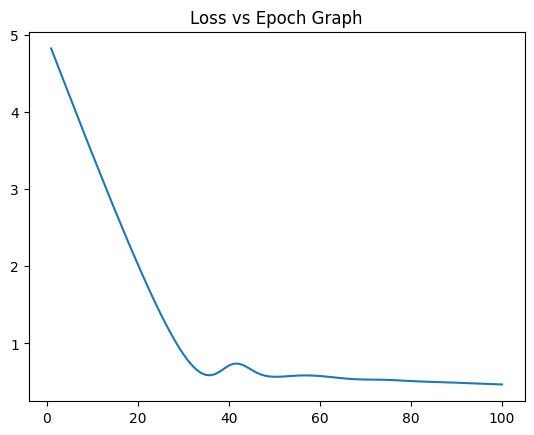

In [ ]:
plt.title("Loss vs Epoch Graph")
plt.plot(torch.arange(1, epochs+1, 1), [loss.detach().numpy() for loss in tot_loss])

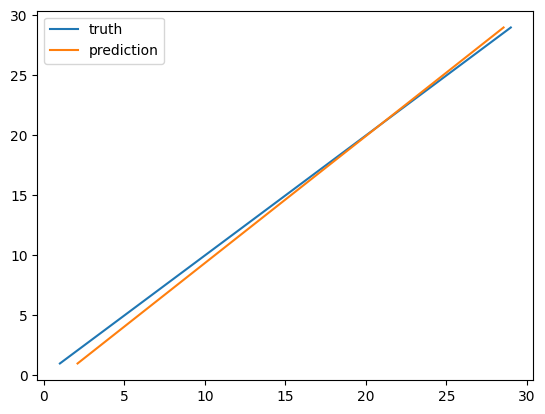

In [ ]:
new_pred = model(x_train)
plt.plot(x_train, y_true, label="truth")
plt.plot([pred.detach().numpy() for pred in new_pred], y_true, label="prediction")
plt.legend()

In [ ]:
for param in model.state_dict():
    print(f"Parameter: {param}, Value: {model.state_dict()[param]}, Size: {model.state_dict()[param].size()}")

Parameter: W, Value: tensor([0.9448]), Size: torch.Size([1])
Parameter: b, Value: tensor([1.1522]), Size: torch.Size([1])


In [ ]:
for param in sgd_optim.state_dict():
    print(f"Var Name: {sgd_optim.state_dict()[param]}")

Var Name: {0: {'step': tensor(160.), 'exp_avg': tensor([-0.5775]), 'exp_avg_sq': tensor([18.6771])}, 1: {'step': tensor(160.), 'exp_avg': tensor([0.3751]), 'exp_avg_sq': tensor([0.0729])}}
Var Name: [{'lr': 0.01, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'params': [0, 1]}]


In [ ]:
model

LinearRegression()

In [ ]:
# Savng model (Recommended way)
path = "/content/my_model.pt"
torch.save(model.state_dict(), path)

In [ ]:
old_model = torch.load(path, weights_only=True)
old_model

OrderedDict([('W', tensor([0.9448])), ('b', tensor([1.1522]))])

In [ ]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Feb  2 18:14 .
drwxr-xr-x 1 root root 4096 Feb  2 16:37 ..
drwxr-xr-x 4 root root 4096 Jan 30 14:18 .config
-rw-r--r-- 1 root root 1502 Feb  2 18:14 my_model.pt
drwxr-xr-x 1 root root 4096 Jan 30 14:19 sample_data


In [ ]:
# Loading Model
loaded_model = LinearRegression()
print(f"Initial State: {loaded_model.state_dict()}")

loaded_model.load_state_dict(torch.load(path, weights_only=True))
print(f"Loaded State: {loaded_model.state_dict()}")

Initial State: OrderedDict([('W', tensor([0.8748])), ('b', tensor([0.9635]))])
Loaded State: OrderedDict([('W', tensor([0.9448])), ('b', tensor([1.1522]))])


In [ ]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(x_train)

loaded_model_preds

tensor([ 2.0969,  3.0417,  3.9865,  4.9313,  5.8760,  6.8208,  7.7656,  8.7103,
         9.6551, 10.5999, 11.5447, 12.4894, 13.4342, 14.3790, 15.3237, 16.2685,
        17.2133, 18.1581, 19.1028, 20.0476, 20.9924, 21.9371, 22.8819, 23.8267,
        24.7715, 25.7162, 26.6610, 27.6058, 28.5505])

In [ ]:
new_pred == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True])

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
scalar = torch.tensor(3)
scalar

tensor(3)

In [ ]:
zeroes = torch.zeros((4, 4), dtype=torch.float64)
ones = torch.ones(4, 2)
zeroes, ones

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]], dtype=torch.float64),
 tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]))

In [ ]:
torch.manual_seed(1729)
# Manually setting the RNG’s seed resets it, so that identical computations depending on random number should, in most settings, provide identical results.

random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


In [ ]:
random1.ndim, random1.shape

(2, torch.Size([2, 3]))

In [ ]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[-7.8838e-33,  4.3579e-41,  1.1448e-33],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 9.1084e-44,  0.0000e+00,  1.1467e-33],
         [ 0.0000e+00,  1.1451e-33,  0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[-7.8838e-33,  4.3579e-41, -7.8838e-33],
         [ 4.3579e-41,  0.0000e+00,  0.0000e+00]],

        [[ 9.1084e-44,  0.0000e+00,  1.1467e-33],
         [ 0.0000e+00,  1.1451e-33,  0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.5062, 0.8469, 0.2588],
         [0.2707, 0.4115, 0.6839]],

        [[0.0703, 0.5105, 0.9451],
         [0.2359, 0.1979, 0.3327]]])


In [ ]:
random_image_tensor = torch.rand((3, 256, 256))
random_image_tensor.ndim, random_image_tensor.shape

(3, torch.Size([3, 256, 256]))

In [ ]:
torch.arange(start=0, end=23, step=3)

tensor([ 0,  3,  6,  9, 12, 15, 18, 21])

In [ ]:
tensorA = torch.rand((3, 2))
tensorB = torch.rand((3, 2))


torch.matmul(tensorA.T, tensorB)

tensor([[1.5828, 0.8624],
        [0.7962, 0.4604]])

In [ ]:
x = torch.arange(start=1, end=21, step=2, dtype=torch.int32)
x, x.dtype

(tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19], dtype=torch.int32),
 torch.int32)

In [ ]:
# Mean aggregation ONLY requires either float or complex Tensor types (not int, long, etc)
# torch.mean(x)
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(10.), tensor(10.))

In [ ]:
x.min(), x.max(), x.sum(), torch.min(x), torch.max(x), torch.sum(x)

(tensor(1, dtype=torch.int32),
 tensor(19, dtype=torch.int32),
 tensor(100),
 tensor(1, dtype=torch.int32),
 tensor(19, dtype=torch.int32),
 tensor(100))

In [ ]:
x = torch.tensor([
    [1, 2, 3],
    [4, 5, 6]
])
x, x.shape

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 torch.Size([2, 3]))

In [ ]:
x_reshape = x.reshape(3, 2)
x_reshape, x_reshape.shape

(tensor([[1, 2],
         [3, 4],
         [5, 6]]),
 torch.Size([3, 2]))

# view() -> return tensor with same memory, size may vary, element will change on both tensors

In [ ]:
z = x.view(3, 2)
z, z.shape

(tensor([[1, 2],
         [3, 4],
         [5, 6]]),
 torch.Size([3, 2]))

In [ ]:
z = z.reshape(-1)
z[3:] = torch.arange(1, 4)
z

tensor([1, 2, 3, 1, 2, 3])

In [ ]:
torch.manual_seed(42)
tensor_random_seed_A = torch.rand(3, 4)
torch.manual_seed(42)
tensor_random_seed_B = torch.rand(3, 4)

print(tensor_random_seed_A == tensor_random_seed_B)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [ ]:
X_train = y_train = torch.rand(9)
X_train, y_train

(tensor([0.4363, 0.6339, 0.3208, 0.4323, 0.1811, 0.6962, 0.8073, 0.2125, 0.3977]),
 tensor([0.4363, 0.6339, 0.3208, 0.4323, 0.1811, 0.6962, 0.8073, 0.2125, 0.3977]))

In [ ]:
X_test = y_test = torch.rand(9)
X_test

tensor([0.9151, 0.5056, 0.2659, 0.5251, 0.1631, 0.7391, 0.9254, 0.2546, 0.9369])

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X, y = make_circles(random_state=42, n_samples=1000)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[:10]

array([[ 0.77230531,  0.20867321],
       [-0.78934876,  0.13010973],
       [-0.79369176,  0.10026659],
       [-0.34062343,  0.72386164],
       [ 0.43711577, -0.89940525],
       [-0.49428769,  0.62903075],
       [-0.01005283,  0.79993684],
       [ 0.78934876,  0.13010973],
       [-0.15976798, -0.78388404],
       [-0.13779029,  0.99046143]])

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import optim

In [ ]:
class CircleModel(nn.Module):
    def __init__(self):
        super(CircleModel, self).__init__()
        self.l1 = nn.Linear(X_train.shape[1], 64)
        self.l2 = nn.Linear(64, 1)

    def forward(self, X):
        z = self.l1(X)
        z = self.l2(z)
        return z

In [ ]:
model = CircleModel().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
model

CircleModel(
  (l1): Linear(in_features=2, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
model.state_dict()

OrderedDict([('l1.weight',
              tensor([[-0.6919,  0.1416],
                      [ 0.3297, -0.4734],
                      [-0.5916, -0.4044],
                      [ 0.6916, -0.4553],
                      [ 0.0236,  0.0813],
                      [-0.6869, -0.2152],
                      [-0.0144,  0.2829],
                      [-0.5119, -0.5454],
                      [ 0.6659,  0.5758],
                      [-0.5741, -0.1296],
                      [-0.0710, -0.0712],
                      [-0.0711, -0.5459],
                      [-0.6702,  0.4137],
                      [ 0.4037,  0.1410],
                      [-0.5858, -0.2136],
                      [ 0.0898, -0.4604],
                      [ 0.6561,  0.4178],
                      [-0.0663,  0.2473],
                      [-0.3619,  0.4784],
                      [ 0.5352,  0.2743],
                      [ 0.3685,  0.2423],
                      [-0.6771, -0.3322],
                      [ 0.3208,  0.3926],
       

In [ ]:
seq_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=64),
    nn.Linear(in_features=64, out_features=1),
)
seq_model

Sequential(
  (0): Linear(in_features=2, out_features=64, bias=True)
  (1): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
preds = model(X_train)
preds.shape, preds[:10]

(torch.Size([800, 1]),
 tensor([[ 0.4344],
         [-0.1710],
         [-0.2612],
         [ 0.4370],
         [ 0.2830],
         [ 0.0102],
         [ 0.1772],
         [ 0.3189],
         [ 0.3249],
         [ 0.0154]], grad_fn=<SliceBackward0>))

In [ ]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_dataset = datasets.FashionMNIST(
                                    root="data",
                                    train=True,
                                    download=True,
                                    transform=ToTensor()
                                )

testing_dataset = datasets.FashionMNIST(
                                    root="data",
                                    train=False,
                                    download=True,
                                    transform=ToTensor(),
                                )

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 171kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.25MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.96MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_opr = [name for name in dir(training_dataset) if not name.startswith("_")]
train_opr

['class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [ ]:
training_dataset.data.shape, testing_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
training_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
training_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

In [ ]:
def show_img(idx):
    plt.imshow(training_dataset.data[idx], cmap="gray")
    plt.title(f"Class: {classes[training_dataset.targets[idx]]}")
    plt.plot()

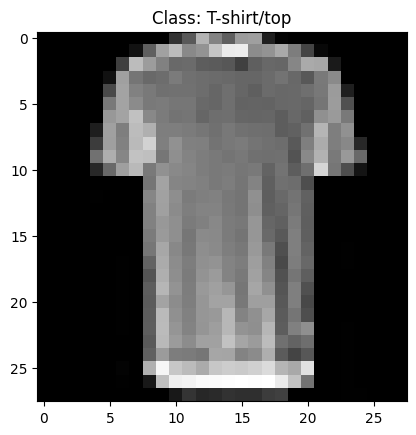

In [ ]:
show_img(789)

In [ ]:
def plot_images():
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = random.randrange(start=0, stop=training_dataset.data.shape[0])
        img, label = training_dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(classes[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

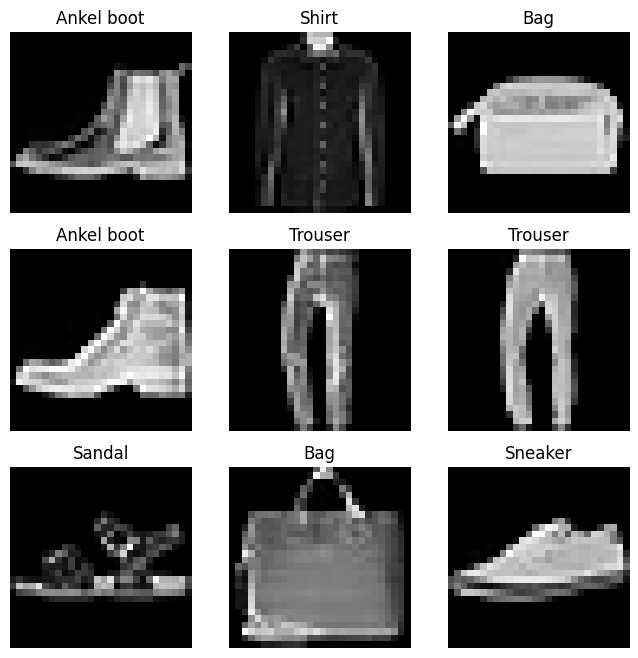

In [ ]:
plot_images()

In [ ]:
batch_size = 64

train_dataloader = DataLoader(
                        dataset=training_dataset,
                        batch_size=batch_size
                    )

test_dataloader = DataLoader(
                        dataset=testing_dataset,
                        batch_size=batch_size
                    )

In [ ]:
train_loader_opr = [name for name in dir(train_dataloader) if not name.startswith("_")]
train_loader_opr

['batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [ ]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
## each element in the dataloader iterable will return a batch of 64 features and labels.

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
device_type = "cuda" if torch.cuda.is_available() else "cpu"
device_type

'cuda'

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.stack = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self):
        x = self.flatten(x)
        logits = self.stack(x)
        return logits


In [ ]:
model = NeuralNetwork().to(device=device_type)

In [ ]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)